
__Data Description__: Data from 2919 properties observed in Ames, Iowa, compiled by Professor Dean De Cock of Truman University, has 79 variables that can profile almost every aspect of this house. Of these, 1460 data are training data containing 79 variables and corresponding house prices, and 1459 data are test data with only these 79 variables and no house price data. This Kaggle challenge requires the submission of predictions for the test data.

The steps taken are as follows:


## Data Cleanning 
* Correlation  
* Scatterplot 


## Data Preparation
* Classification label encoding 
* Missing value handling 
* Skew feature conversion 


## Basic Models 
* Linear Regression (Linear algo)
* Ridge Regression (Linear algo)
* LASSO Linear Regression (Linear algo)
* Elastic Net Regression (Linear algo)



## Integration Models 
* Bagging 
* Random Forest
* Adaboost
* GBDT(Gradient Boosting Decision Tree)
* Xgboost



In [47]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
df = pd.read_csv('train.csv')
# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')
# df = pd.concat((train_df, test_df), axis=0)
# df.head(100)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 1) Data Cleanning

First of all, we want to drop thoese useless columns and to check whether there are any duplicate values in our dataset. If there is any, we will need to drop them.

In [48]:
# "Id" column looks like useless, drop it.
del df['Id']
#"PoolQC" column is empty, we are going to drop it.
del df['PoolQC']

# del df['Alley']

In [49]:
sum(df.duplicated(df.columns))
df = df.drop_duplicates(df.columns, keep='last')
df.shape

(1460, 79)

Now, Let's look into details.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

After browsing the information of dataset, we can see they use "NaN" to represent the missing values. Before prediction, we should clean these rows in the data table.

Before cleaning missing values, We need to convert some of the columns(for example, BsmtFullBath is object) to appropriate datatype.

In [51]:
df['BsmtFullBath'] = pd.to_numeric(df['BsmtFullBath'], errors='coerce')
df['BsmtHalfBath'] = pd.to_numeric(df['BsmtHalfBath'], errors='coerce')

In [52]:
variables = df.columns

data = []
for variable in variables:
    l = df[variable].count()
    data.append(l)
available_per = np.round(pd.Series(data)/len(df), 3)

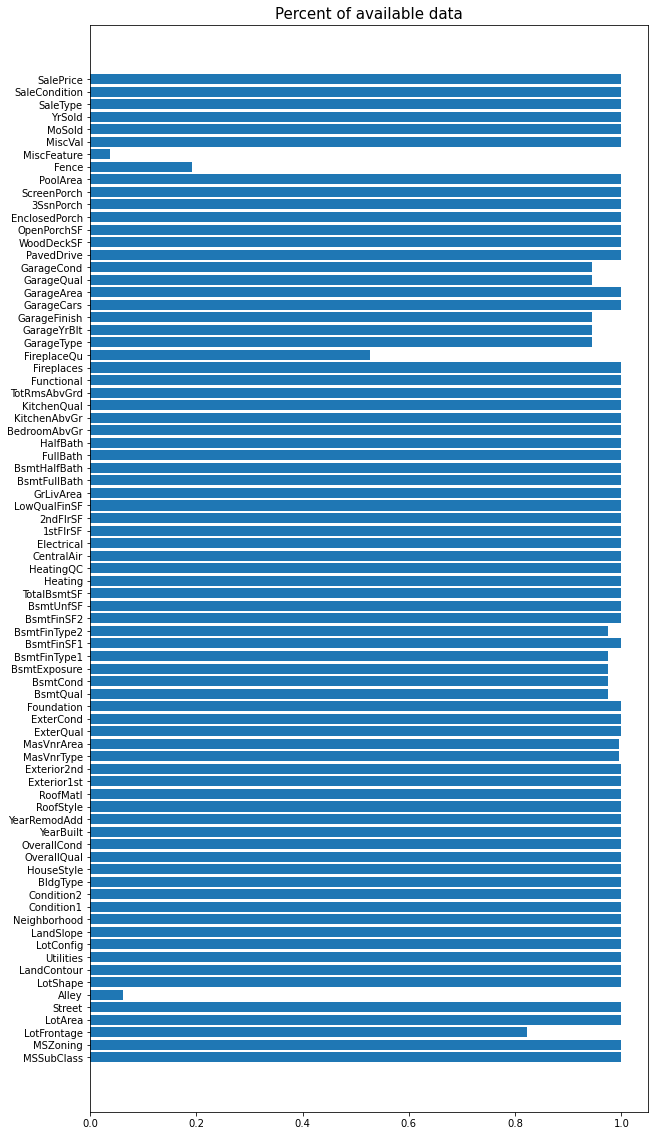

In [53]:
plt.figure(figsize=(10,20))
plt.barh(variables, available_per)
plt.title("Percent of available data", fontsize=15)
plt.show()

As shown in the figure, SalePrice, MiscFeature, Fence, FireplaceQu, Alley and LotFrontage have the lowest percent of available data. 


For LotFrontage, in this case, we will use mean values to fill them up.

In [54]:
# df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
# df['SalePrice']=df['SalePrice'].fillna(df['SalePrice'].mean())
# df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
# df['MasVnrArea']=df['MasVnrArea'].fillna(df['GarageYrBlt'].mean())
numeric = ['int64','float64']
zz = df.select_dtypes(include=numeric)
xcols = zz.columns

for column in xcols.tolist():
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)
df.shape

(1460, 79)

Now Let's recap and revisit the details of the remaining dataset.

In [55]:
print(df.shape)
df.head(10)

(1460, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.000000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.000000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,70.049958,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.000000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.000000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,0,1,2008,WD,Normal,118000


In [56]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Finally, it's time check the outliers in our datasets, let's first look into the column sale price.

### SalePrice

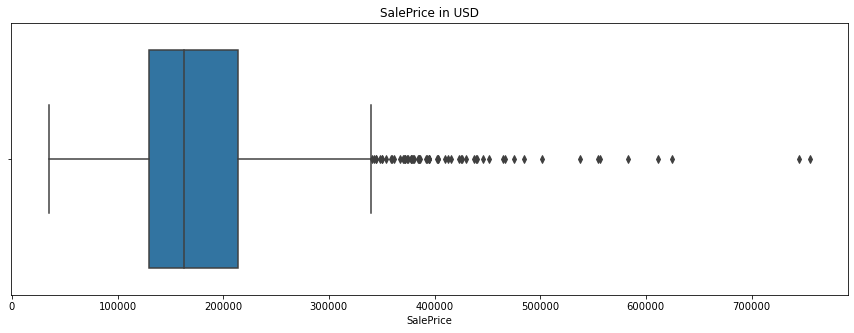

In [57]:
plt.figure(figsize=(15,5))

sns.boxplot(x='SalePrice', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('SalePrice in USD')
plt.show()

1.8828757597682129

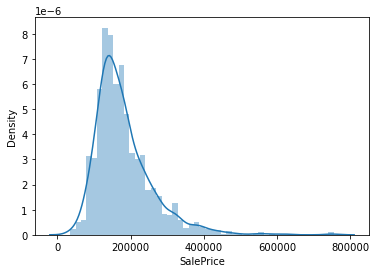

In [58]:
df = df[(df['SalePrice'] > 0) & (df['SalePrice'] < 800000)] 
sns.distplot(df['SalePrice'])
df['SalePrice'].skew()

The skew index for house prices is 1.88, which is consistent with the distribution plot and reflects a rightward skew in the distribution of house prices.

Therefore, we plan to use logarithmic operations.



<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

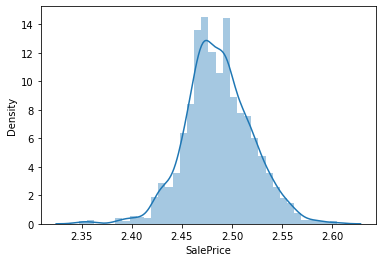

In [59]:
df['SalePrice']=np.log(df['SalePrice'])
sns.distplot(np.log(df['SalePrice']))

#### LotArea

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

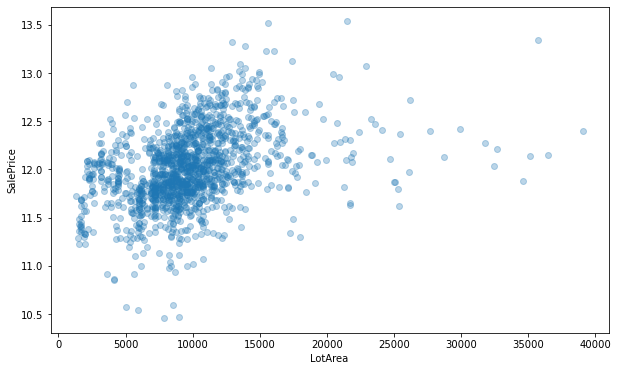

In [60]:
df = df[df['LotArea'] < 40000]

plt.figure(figsize=(10,6))
sns.regplot(x='LotArea', y='SalePrice', data=df, fit_reg=False, scatter_kws={'alpha':0.3})


#### LotArea

In [61]:
df[["LotArea", "SalePrice"]].groupby(['LotArea'], as_index=False).count().sort_values(by='SalePrice', ascending=False)

,LotArea,SalePrice
202,7200,25
498,9600,24
135,6000,17
409,9000,14
320,8400,14
...,...,...
395,8923,1
396,8924,1
397,8925,1
398,8926,1


In [62]:
df = df[(df['LotArea'] > 0) & (df['LotArea'] != 39104)] 


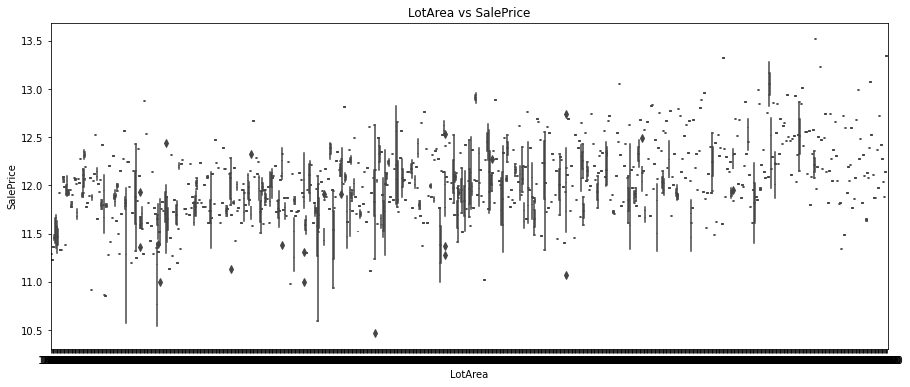

In [63]:
plt.figure(figsize=(15,6))
sns.boxplot(x='LotArea', y='SalePrice', data=df)
plt.title('LotArea vs SalePrice')
plt.show()

### BsmtFinSF1

In [64]:
df[["BsmtFinSF1", "SalePrice"]].groupby(['BsmtFinSF1'], as_index=False).count().sort_values(by='SalePrice', ascending=False)

,BsmtFinSF1,SalePrice
0,0,466
4,24,12
2,16,9
468,936,5
3,20,5
...,...,...
296,605,1
293,602,1
291,599,1
44,170,1


In [65]:
df = df[(df['BsmtFinSF1'] >= 0) & (df['BsmtFinSF1'] != 2188)] 


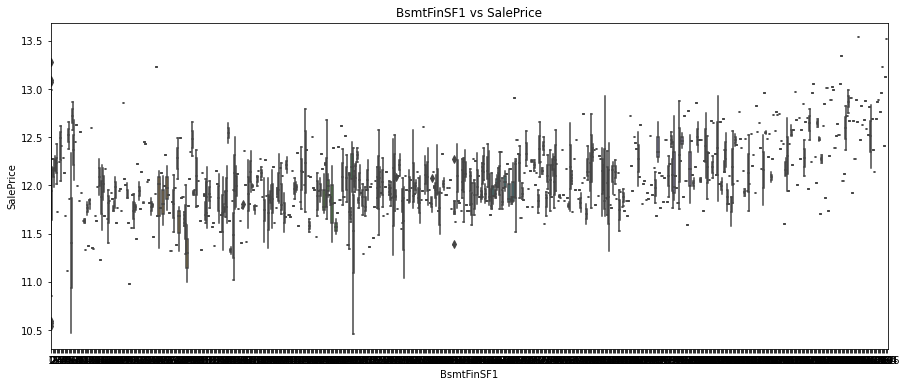

In [66]:
plt.figure(figsize=(15,6))
sns.boxplot(x='BsmtFinSF1', y='SalePrice', data=df)
plt.title('BsmtFinSF1 vs SalePrice')
plt.show()

## 2) Data Preparation

In [67]:
#"Alley" only has few values, so we are going to drop it.
# num = df['Alley'].isna().sum()
print("The percent of rows with nan in alley:" + str(df['Alley'].isna().sum()/len(df)))
print("The percent of rows with nan in fence:" + str(df['Fence'].isna().sum()/len(df)))
print("The percent of rows with nan in MiscFeature:" + str(df['MiscFeature'].isna().sum()/len(df)))


del df['Alley']
del df['Fence']
del df['MiscFeature']


The percent of rows with nan in alley:0.9369806094182825
The percent of rows with nan in fence:0.8054016620498615
The percent of rows with nan in MiscFeature:0.96398891966759


<AxesSubplot:>

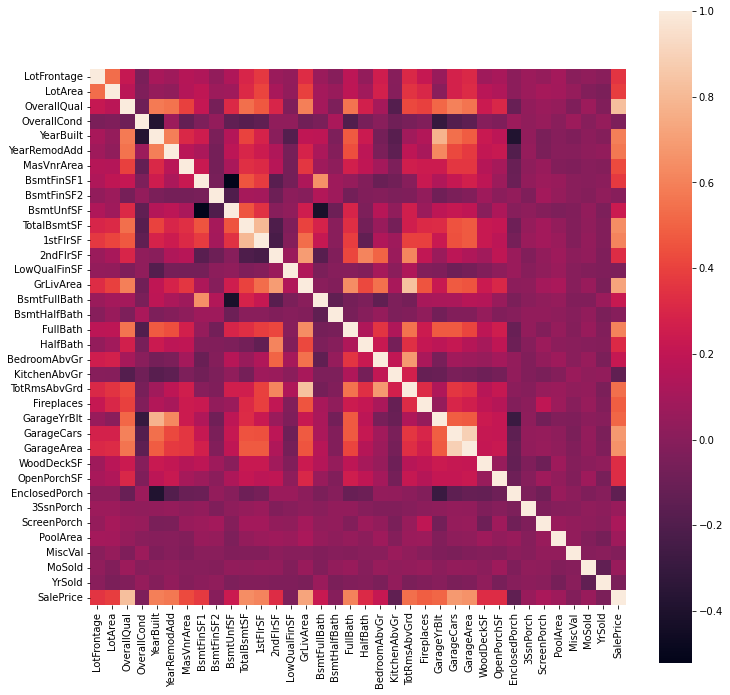

In [68]:
# cor = df.corr()
# fig, ax = plt.subplots(figsize=(20,20))
# sns.heatmap(cor,annot=True, ax = ax)

corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

More analysis for the highly correlated independent variable from datasets.

In [69]:
# xcolumns= sale_house[['SALE PRICE', 'BUILDING CLASS CATEGORY', 'BOROUGH', 'TAX CLASS AT PRESENT']]
# XX = sale_house.drop(c)
# yy = sale_house['SALE PRICE']
# XX

zz = df.select_dtypes(include='object')
xcols = zz.columns
xcols = xcols.tolist()
xcols.append('SalePrice')

XX = df.drop(xcols,axis=1)
yy = df['SalePrice']
XX



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [70]:
yy = yy*100
yy = yy.astype('int')

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [72]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(XX,yy)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(XX.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score'] 
print(featureScores.nlargest(36,'Score'))


         Features          Score
33        MiscVal  869373.070813
2         LotArea  688701.061551
13       2ndFlrSF  219033.646818
8      BsmtFinSF1  188066.482415
32       PoolArea  173435.316117
7      MasVnrArea  172639.483235
15      GrLivArea  155415.618016
14   LowQualFinSF  136250.531685
11    TotalBsmtSF  122114.737880
10      BsmtUnfSF  101108.421033
9      BsmtFinSF2   85683.130108
12       1stFlrSF   83417.751112
26     GarageArea   71820.491883
31    ScreenPorch   55174.690539
27     WoodDeckSF   49946.889787
30      3SsnPorch   45623.816044
29  EnclosedPorch   38197.472959
28    OpenPorchSF   37218.575759
0      MSSubClass    6296.691450
1     LotFrontage    2618.153312
23     Fireplaces     333.665614
3     OverallQual     330.369586
5       YearBuilt     323.709364
25     GarageCars     249.249029
22   TotRmsAbvGrd     229.105780
34         MoSold     221.166394
19       HalfBath     219.671963
16   BsmtFullBath     161.701362
24    GarageYrBlt     161.545237
17   BsmtH

From Univariate Selection, we can see that YrSold, YearRemodAdd, GarageYrBlt, and MoSold are not important features to predict SALE PRICE, so we can delete this feature. Similarily, KitchenAbvGr, TotRmsAbvGrd and BedroomAbvGr, BsmtHalfBath and BsmtFullBath, FullBath and HalfBath.

But for LotArea, GrLivArea, GarageArea, PoolArea and MasVnrArea, they have high correlation and high importance. 

Also 2ndFlrSF and 1stFlrSF, BsmtFinSF1, BsmtUnfSF and TotalBsmtSF, BsmtFinSF2 etc.

Hence we use PCA to process these two features.

In [73]:
del df['YrSold']
del df['YearRemodAdd']
del df['GarageYrBlt']
del df['KitchenAbvGr']
del df['TotRmsAbvGrd']
del df['BedroomAbvGr']
del df['BsmtHalfBath']
del df['BsmtFullBath']
del df['FullBath']
del df['HalfBath']

df


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,WD,Normal,12.072541
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,WD,Normal,12.254863
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,WD,Normal,12.493130
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,WD,Normal,11.864462


In [74]:
df.shape

(1444, 66)

- PCA

LotArea, GrLivArea, GarageArea, PoolArea and MasVnrArea

2ndFlrSF and 1stFlrSF

BsmtFinSF1, BsmtUnfSF, BsmtFinSF2, and TotalBsmtSF.

In [75]:
combine1 = df[['LotArea','GrLivArea','GarageArea','PoolArea','MasVnrArea']]
combine2 = df[['2ndFlrSF','1stFlrSF']]
combine3 = df[['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','BsmtFinSF2']]

In [76]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 1)
pca2 = PCA(n_components = 1)
pca3 = PCA(n_components = 1)
pca1.fit(combine1)
pca2.fit(combine2)
pca3.fit(combine3)
df['Combine Area'] = pca1.transform(combine1)
df['Combine FlrSF'] = pca2.transform(combine2)
df['Combine BsmtFinSF'] = pca3.transform(combine3)

In [77]:
del df['LotArea']
del df['GrLivArea']
del df['GarageArea']
del df['MasVnrArea']
del df['2ndFlrSF']
del df['1stFlrSF']
del df['BsmtFinSF1']
del df['BsmtUnfSF']
del df['TotalBsmtSF']
del df['BsmtFinSF2']
df

,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Combine Area,Combine FlrSF,Combine BsmtFinSF
0,60,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,2,WD,Normal,12.247694,-1311.023525,588.566923,-514.068951
1,20,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,5,WD,Normal,12.109011,-186.711864,-356.478370,-536.974188
2,60,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,9,WD,Normal,12.317167,1489.720117,569.786850,-150.229536
3,70,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,2,WD,Abnorml,11.849398,-211.869924,453.254654,82.850363
4,60,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,12,WD,Normal,12.429216,4520.448048,632.350150,-188.448726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,8,WD,Normal,12.072541,-1849.022323,401.880882,558.144208
1456,20,RL,85.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,2,WD,Normal,12.254863,3423.988257,-729.481771,-158.054094
1457,70,RL,66.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,2500,5,WD,Normal,12.493130,-695.536119,700.480703,348.876778
1458,20,RL,68.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,4,WD,Normal,11.864462,-82.232554,-271.851211,-222.777623


In [78]:
#one hot encoded
#https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
zz = df.select_dtypes(include='object')
xcols = zz.columns
one_hot_features = xcols.tolist()
#one_hot_features
#one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']

In [79]:
# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
one_hot_encoded = pd.get_dummies(df[one_hot_features])
one_hot_encoded.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1444 entries, 0 to 1459
Data columns (total 237 columns):
 #    Column                 Non-Null Count  Dtype
---   ------                 --------------  -----
 0    MSZoning_C (all)       1444 non-null   uint8
 1    MSZoning_FV            1444 non-null   uint8
 2    MSZoning_RH            1444 non-null   uint8
 3    MSZoning_RL            1444 non-null   uint8
 4    MSZoning_RM            1444 non-null   uint8
 5    Street_Grvl            1444 non-null   uint8
 6    Street_Pave            1444 non-null   uint8
 7    LotShape_IR1           1444 non-null   uint8
 8    LotShape_IR2           1444 non-null   uint8
 9    LotShape_IR3           1444 non-null   uint8
 10   LotShape_Reg           1444 non-null   uint8
 11   LandContour_Bnk        1444 non-null   uint8
 12   LandContour_HLS        1444 non-null   uint8
 13   LandContour_Low        1444 non-null   uint8
 14   LandContour_Lvl        1444 non-null   uint8
 15   Utilities_AllPub   

In [80]:
numeric_data=df.select_dtypes(include=[np.number])
numeric_data.describe()

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,LowQualFinSF,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Combine Area,Combine FlrSF,Combine BsmtFinSF
count,1444.00000,1444.000000,1444.00000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1.444000e+03,1.444000e+03,1.444000e+03
mean,57.00831,69.794072,6.08795,5.574100,1971.231994,5.909280,0.600416,1.761080,92.133657,46.099030,22.162742,3.447368,14.961219,2.457064,43.139889,6.319945,12.018175,-5.280061e-13,3.346046e-14,1.417149e-15
std,42.29943,21.006177,1.37441,1.114098,30.238292,48.887989,0.634228,0.747633,121.534800,65.333617,61.411491,29.477207,55.651486,38.394101,498.403105,2.701375,0.395729,4.244985e+03,4.562593e+02,5.375899e+02
min,20.00000,21.000000,1.00000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.460242,-8.477440e+03,-1.260701e+03,-1.101750e+03
25%,20.00000,60.000000,5.00000,5.000000,1954.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,11.773749,-2.270533e+03,-3.680916e+02,-4.220656e+02
50%,50.00000,70.049958,6.00000,5.000000,1973.000000,0.000000,1.000000,2.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,11.995352,-3.540717e+02,-1.734261e+02,-1.185540e+02
75%,70.00000,79.000000,7.00000,6.000000,2000.000000,0.000000,1.000000,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.268695,1.698903e+03,4.533245e+02,3.953364e+02
max,190.00000,313.000000,10.00000,9.000000,2010.000000,572.000000,3.000000,4.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,13.534473,2.669643e+04,1.263400e+03,1.746248e+03


In [81]:
scaler = StandardScaler()
scaler.fit(df[numeric_data.columns])
scaled = scaler.transform(df[numeric_data.columns])

for i, col in enumerate(numeric_data.columns):
       df[col] = scaled[:,i]

In [82]:

df.drop(one_hot_features,axis=1,inplace=True)
df = pd.concat([df, one_hot_encoded] ,axis=1)
df

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,LowQualFinSF,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.070751,-0.228301,0.663824,-0.515483,1.050953,-0.120916,-0.947015,0.319679,-0.758347,0.228154,...,0,0,0,1,0,0,0,0,1,0
1,-0.875216,0.486022,-0.064013,2.178212,0.157736,-0.120916,0.630251,0.319679,1.694475,-0.705839,...,0,0,0,1,0,0,0,0,1,0
2,0.070751,-0.085436,0.663824,-0.515483,0.984788,-0.120916,0.630251,0.319679,-0.758347,-0.062762,...,0,0,0,1,0,0,0,0,1,0
3,0.307243,-0.466409,0.663824,-0.515483,-1.860273,-0.120916,0.630251,1.657696,-0.758347,-0.169941,...,0,0,0,1,1,0,0,0,0,0
4,0.070751,0.676508,1.391661,-0.515483,0.951706,-0.120916,0.630251,1.657696,0.821995,0.580315,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.070751,-0.371166,-0.064013,-0.515483,0.918624,-0.120916,0.630251,0.319679,-0.758347,-0.093384,...,0,0,0,1,0,0,0,0,1,0
1456,-0.875216,0.724130,-0.064013,0.382415,0.223900,-0.120916,2.207517,0.319679,2.114253,-0.705839,...,0,0,0,1,0,0,0,0,1,0
1457,0.307243,-0.180680,0.663824,3.076110,-1.000138,-0.120916,2.207517,-1.018339,-0.758347,0.212843,...,0,0,0,1,0,0,0,0,1,0
1458,-0.875216,-0.085436,-0.791850,0.382415,-0.702399,-0.120916,-0.947015,-1.018339,2.254179,-0.705839,...,0,0,0,1,0,0,0,0,1,0


In [83]:
df

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,LowQualFinSF,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.070751,-0.228301,0.663824,-0.515483,1.050953,-0.120916,-0.947015,0.319679,-0.758347,0.228154,...,0,0,0,1,0,0,0,0,1,0
1,-0.875216,0.486022,-0.064013,2.178212,0.157736,-0.120916,0.630251,0.319679,1.694475,-0.705839,...,0,0,0,1,0,0,0,0,1,0
2,0.070751,-0.085436,0.663824,-0.515483,0.984788,-0.120916,0.630251,0.319679,-0.758347,-0.062762,...,0,0,0,1,0,0,0,0,1,0
3,0.307243,-0.466409,0.663824,-0.515483,-1.860273,-0.120916,0.630251,1.657696,-0.758347,-0.169941,...,0,0,0,1,1,0,0,0,0,0
4,0.070751,0.676508,1.391661,-0.515483,0.951706,-0.120916,0.630251,1.657696,0.821995,0.580315,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.070751,-0.371166,-0.064013,-0.515483,0.918624,-0.120916,0.630251,0.319679,-0.758347,-0.093384,...,0,0,0,1,0,0,0,0,1,0
1456,-0.875216,0.724130,-0.064013,0.382415,0.223900,-0.120916,2.207517,0.319679,2.114253,-0.705839,...,0,0,0,1,0,0,0,0,1,0
1457,0.307243,-0.180680,0.663824,3.076110,-1.000138,-0.120916,2.207517,-1.018339,-0.758347,0.212843,...,0,0,0,1,0,0,0,0,1,0
1458,-0.875216,-0.085436,-0.791850,0.382415,-0.702399,-0.120916,-0.947015,-1.018339,2.254179,-0.705839,...,0,0,0,1,0,0,0,0,1,0


In [84]:
df4 = df
y = df4.pop('SalePrice')

In [40]:
y

0       0.656319
1       0.165847
2       0.902017
3      -0.752309
4       1.298295
          ...   
1454    0.154551
1455    0.154551
1456    0.154551
1457    0.154551
1458    0.154551
Name: SalePrice, Length: 2896, dtype: float64

In [85]:
X = df4
X

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,LowQualFinSF,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.070751,-0.228301,0.663824,-0.515483,1.050953,-0.120916,-0.947015,0.319679,-0.758347,0.228154,...,0,0,0,1,0,0,0,0,1,0
1,-0.875216,0.486022,-0.064013,2.178212,0.157736,-0.120916,0.630251,0.319679,1.694475,-0.705839,...,0,0,0,1,0,0,0,0,1,0
2,0.070751,-0.085436,0.663824,-0.515483,0.984788,-0.120916,0.630251,0.319679,-0.758347,-0.062762,...,0,0,0,1,0,0,0,0,1,0
3,0.307243,-0.466409,0.663824,-0.515483,-1.860273,-0.120916,0.630251,1.657696,-0.758347,-0.169941,...,0,0,0,1,1,0,0,0,0,0
4,0.070751,0.676508,1.391661,-0.515483,0.951706,-0.120916,0.630251,1.657696,0.821995,0.580315,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.070751,-0.371166,-0.064013,-0.515483,0.918624,-0.120916,0.630251,0.319679,-0.758347,-0.093384,...,0,0,0,1,0,0,0,0,1,0
1456,-0.875216,0.724130,-0.064013,0.382415,0.223900,-0.120916,2.207517,0.319679,2.114253,-0.705839,...,0,0,0,1,0,0,0,0,1,0
1457,0.307243,-0.180680,0.663824,3.076110,-1.000138,-0.120916,2.207517,-1.018339,-0.758347,0.212843,...,0,0,0,1,0,0,0,0,1,0
1458,-0.875216,-0.085436,-0.791850,0.382415,-0.702399,-0.120916,-0.947015,-1.018339,2.254179,-0.705839,...,0,0,0,1,0,0,0,0,1,0


In [96]:
X_test = pd.read_csv('test.csv')

In [157]:
X.to_csv('X.csv',index=False)
y.to_csv('y.csv',index=False)

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 3) Basic Models

### 3.1) Linear

In [111]:
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [112]:
from sklearn.model_selection import cross_val_score
linear=LinearRegression()
linear.fit(X_train, y_train.values)
y_pred = linear.predict(X_test)
result_linear = rmse(y_test, y_pred)
result_linear

2514956281.7912126

### 3.2)Ridge, Lasso

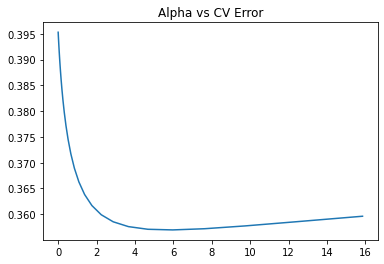

In [117]:
alphas = np.logspace(-4, 1.2, 50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    clf.fit(X_train, y_train.values)
    y_pred = clf.predict(X_test)
    test_scores.append(rmse(y_test, y_pred))

plt.plot(alphas, test_scores)
plt.title("Alpha vs CV Error");

The Ridge regression model performs best when α is around 5, with a root mean square error of about 0.358.

### 3.6)Lasso

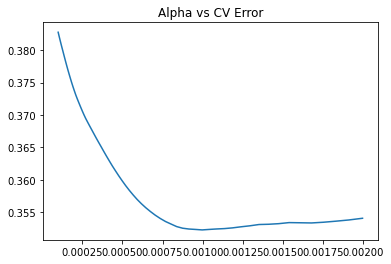

In [132]:
alphas = np.logspace(-4, -2.7, 70)
test_scores = []
for alpha in alphas:
    clf = Lasso(alpha)
    clf.fit(X_train, y_train.values)
    y_pred = clf.predict(X_test)
    test_scores.append(rmse(y_test, y_pred))


plt.plot(alphas, test_scores) 
plt.title("Alpha vs CV Error");

The Lasso Regression regression performs best when α is taken around 0.0008, with a root mean square error of about 0.352, which is slightly better than the Ridge regression of 0.358.

* Elastic Net Regression

The Elastic Net Regression combines the advantages of Ridge regression and Lasso regression, i.e., the constraints on the coefficients in the objective function have both L2 and L1 penalty. The previous Ridge and Lasso Regression models show that the best Lasso Regression model is obtained for an L1 parameter of 0.0004, and the best Ridge Regression model is available for an L2 parameter of 10.


In [156]:
# First try to use the best L1, L2 parameters obtained earlier
alpha = 5.0007
l1_ratio = 0.0007/alpha
clf = ElasticNet(alpha = alpha, l1_ratio=l1_ratio)
clf.fit(X_train, y_train.values)
y_pred = clf.predict(X_test)
test_score = rmse(y_test, y_pred)
test_score

0.6507106958173657

In [142]:
# The score is not satisfactory, so the above method does not work very well. Try to get new parameters by iteration.
from itertools import product
alphas = [0.0005, 0.001, 0.01, 0.03, 0.05, 0.1]
l1_ratios = [1, 0.9, 0.8, 0.7, 0.5, 0.4,0.3]
score_elastic = []
for (alpha, l1_ratio) in product(alphas, l1_ratios):
    clf = ElasticNet(alpha = alpha, l1_ratio = l1_ratio)
    clf.fit(X_train, y_train.values)
    y_pred = clf.predict(X_test)
    score_elastic.append(rmse(y_test, y_pred))


Text(0.5, 0, 'alpha - l1_ratio')

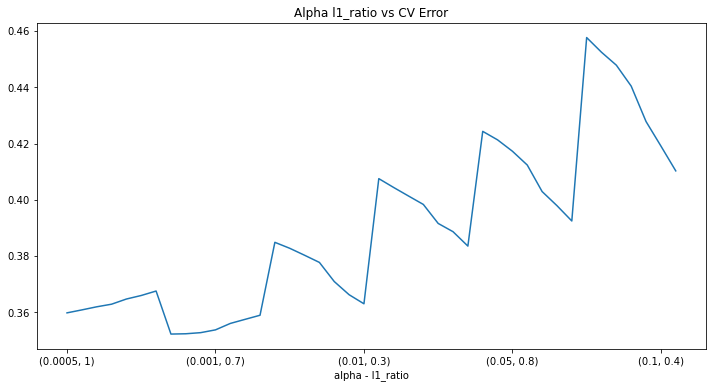

In [143]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

idx = list(product(alphas, l1_ratios))
p_cv_elastic = pd.Series(score_elastic, index = idx)
p_cv_elastic.plot(title = "Alpha l1_ratio vs CV Error")
plt.xlabel("alpha - l1_ratio")


As we can see above, the second 5 parameter pairs have the lowest error.

Text(0.5, 0, 'alpha - l1_ratio')

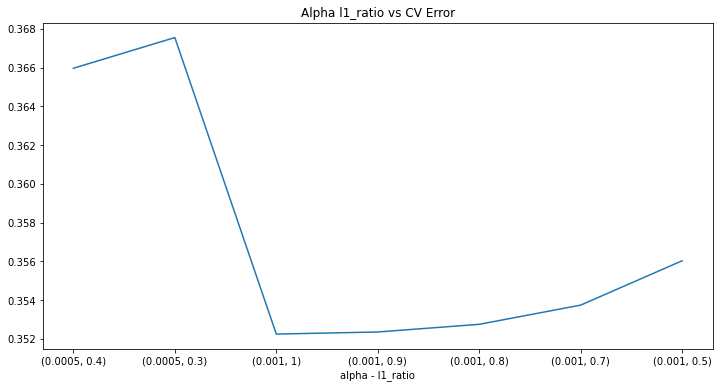

In [155]:
# Zoom in on the second 5 parameter pairs
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
idx = list(product(alphas, l1_ratios))[5:12]
p_cv_elastic = pd.Series(cv_elastic[5:12], index = idx)
p_cv_elastic.plot(title = "Alpha l1_ratio vs CV Error")
plt.xlabel("alpha - l1_ratio")

The best performance is obtained when α is 0.001 and L1 accounts for 1, and the root mean square error is about 0.353.

In summary, the best performance is obtained when α is 0.001.

## 4) Integration Models

* Bagging 

For the above best Lasso regression, Elastic Net regression and Ridge regression model with Bagging regression to improve and to see how the model works.